In [1]:
# Chapter 4 Training Models

In [2]:
## 4.1 Linear Regression
# 4.1.1 Normal Equation

import numpy as np

X = 2 * np.random.rand(100, 1)


In [3]:
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
# Now let's compute theta using Normal Equaltion
# prepend 1 to each instance (intercept)
X_b = np.c_[np.ones((100, 1)), X]

# dot is multiplication of matrices and inv is to compute inverse of a matrix
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.89697707],
       [3.11092451]])

In [5]:
# Make predictions using theta_best

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.89697707],
       [10.11882609]])

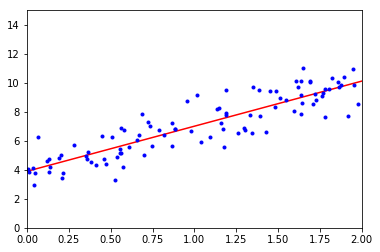

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# plot the model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# The similar code using scikit-learn library:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.89697707]), array([[3.11092451]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.89697707],
       [10.11882609]])

In [9]:
# Computational Complexity
# X.T is a n * n matrix
# complexity of inversing this kind of matrix is O(n^2.4) to O(n^3)
# Training the model using Normal Equaltions will be very slow
# But doing prediction with this model will be very efficient

In [10]:
## 4.2 Gradient Descent
# When using, you should ensure that all features have a similar scale (using scikit-learn's StandardScaler)
# or else it will take much longer time to converge( some features with high volumes will take more steps )

# 4.2.1 Batch Gradient Descent
# Calculating partial derivative of each parameter theta with regard to the cost function
# You can compute them all in one go

# Batch GD involves calculations over the full training set X at each gradient step
# Gradient descent scales well with the number of features, so it is faster to train model
# using gradient descent than normal equation when the number of features is large

# When you have the gradient(the partial derivatives), you can go in the opposite direction
# to go downhill this means subtracting the partial derivative of theta from the original theta
# but we need to specify a learning rate

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = [[2], [1]]

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.89697707],
       [3.11092451]])

In [11]:
# To find a good learning rate, you can use grid search

In [12]:
# 4.2.2 Stochastic Gradient Descent
# select a random instance every step and compute gradient with regard to that instance
# This enables the algorithm to be applied to a very large training set
# This algorithm is not regular, it will bounce around all the time
# This randomness can help go out of local minima but is hard to settle to global minima
# One solution is to gradually shrink the learning rate, this approach is called
# simulated annealing
# The procedure to determing the learning rate at every step is called the learning schedule

n_epochs = 50
t0, t1 = 5, 50 # Learning Schedule Hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

# When epoch grows, the general learning rate decreases
# We train n_epochs rounds, each rounds we will include all instances from the training set
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.91095886],
       [3.14111005]])

In [13]:
# To perform LinearRegression using SGD with Scikit-Learn, you can use the SGDRegressor
# Which defaults to optimizing the squared error cost function

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) # 50 epochs
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([3.83765911]), array([3.03889548]))

In [14]:
# 4.2.3 Mini-Batch Gradient Descent
# Each step computes the gradient based on small random sets of instances called mini-batches
# You can get hardware performance boost optimizations for matrix operations especially when
# using GPUs

# Conclusion
# Normal Equaltion: large m fast, large n slow, no need scaling LinearRegression
# Batch GD: large m slow, large n fast, 2 hyper params, need scaling
# Stochastic GD: large m fast, large n fast, >=2 hyper params, SGDRegressor
# Mini-Batch GD: large m fast, large n fast, >=2 hyper params

In [15]:
## 4.3 Polynomial Regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X[0]

array([0.33924575])

In [16]:
# Using scikit-learn's PolynomialFeatures class to transform our training data
# Adding 2nd-degree polynomials of each feature in the training set as new features

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([0.33924575, 0.11508768])

In [17]:
# Now X_poly contains the original feature and the square of this feature
# Now you can fit a LinearRegression model to extend the training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92501868]), array([[0.9737769 , 0.50150655]]))

In [18]:
# Polynomial features will add all combinations of features up to the given degree
# e.g if degree = 3 and there are features a b, then it will add features
# a^2 a^3 b^2 b^3 and ab ab^2 a^2b and so on
# Question: how many combinations given n features and d degrees?


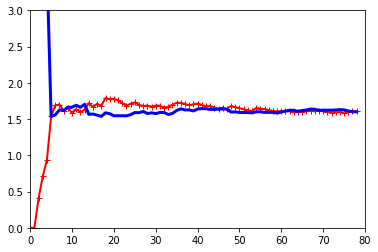

In [19]:
## 4.4 Learning Curve
# Polynomial regression tends to overfit the data
# Using cross validation, if the model performs well on training data but generalizes poorly
# according to the cross-validation metrics, then your model is overfitting
# If it performs poorly on both then it is underfitting. This is one way to tell
# When a model is too simple or too complex

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
lin_reg = LinearRegression()
plt.axis([0, 80, 0, 3])                         # not shown in the book
plot_learning_curves(lin_reg, X, y)

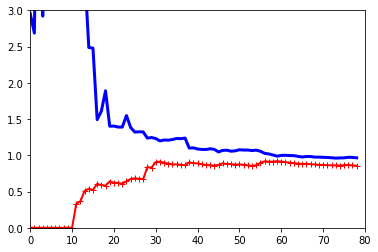

In [20]:
# If your model is underfitting your data, adding more training examples will not
# help, you need to use a more complex model or come up with better features

# Now let's look at the learning curves of a 10th degree polynomial model on the same data
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))

plt.axis([0, 80, 0, 3])           # not shown
plot_learning_curves(polynomial_regression, X, y)

# There is a significant gap betweem performance on the training data and validation data
# This is a hallmark for model overfitting
# One way to improve an overfitting data is to continue feeding it more training data
# Until the validation error reaches training error
# See Bias-Variance Tradeoff, you need to know how to deduce this

In [21]:
## 4.5 Regularized linear models

# 4.5.1 Ridge rigression
# add theta^2 * alpha penalty term to every parameter to constraint the parameter to not be too huge
# The hyper parameter alpha controls how hard you constrain the paramters to be not too large
# Note the bias term theta0 is not regularized
# You must scale the terms before doing ridge regression (StandardScaler)

# Use Scikit-learn to do ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.23516666]])

In [22]:
# also you can use SGDRegressor and add a penalty hyper parameter
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.52714873])

In [23]:
# 4.5.2 Lasso regression
# Least Absolute Shrinkage and Selection Operator Regression
# Lasso uses l1-norm (absolute value) as penalty term
# Lasso tends to completely eliminate the least important features
# In other words lasso altomatically does feature selection and outputs a sparse model
# Lasso terms is not differentiable at 0 points, in these points you can use a subgradient(approximation) vector
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.20393728])

In [24]:
# 4.5.3 Elastic Net
# Elastic net is a middle ground between Lasso and Ridge regression
# The penalty term is simply a mixture of the lasso and ridge term
# you can control r the mixture rate
# We should consider Ridge regression as default, but if you suspect that
# Only a few features are needed, you should try to use Lasso regression
# We should prefer elastic net over lasso
# When number of features is larger than number of features, or when two features are
# strongly correlated, lasso performs erratically
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([5.20314363])

In [26]:
# 4.5.4 Early Stopping
# Stop iteration when the cost value is lower than a barrier
# training error could go down but generalization error could go down and then up
# So early stopping may help us find a better model
# Hinton called it "Beautiful Free Lunch"
# To implement it we can use epoch=1 and warm_start to train every round of SGD
# and then start when you left off and to record the best epoch and the best model during training (say 1000 rounds)
# See the details for SGDRegressor

In [27]:
# 4.6 Logistic Regression
from sklearn import datasets
iris = datasets.load_iris()

In [28]:
list(iris.keys())

['DESCR', 'data', 'target', 'target_names', 'feature_names']

In [29]:
X = iris["data"][:, 3:]

In [30]:
y = (iris["target"] == 2).astype(np.int)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

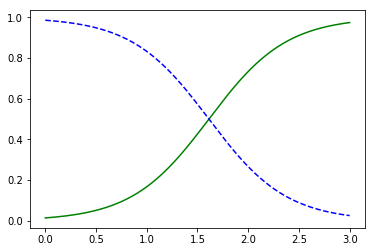

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Non-Iris-Virginica")

# Sklearn uses l2 penalty by default

In [33]:
# Softmax Regression
X = iris["data"][:, (2, 3)]
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
softmax_reg.predict([[5, 2]])


array([2])

In [35]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])